# Support Vector Machine (SVM) from Scratch - Math & Implementation in Python
This notebook follows a [youtube video](https://www.youtube.com/watch?v=qiLzuaXIBb8) walkthrough. The below sections cover the python implementation of SVM Classification from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Initialize X, y, w, b
First we will initialize a sample dataset given X input features and y output labels.

In [2]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.5, random_state=42)
X.shape, y.shape, X[:5], y[:5]

((100, 2),
 (100,),
 array([[-4.18630746,  8.36447971],
        [ 8.43055819,  5.66147687],
        [-4.41453716,  9.40251519],
        [ 7.5170894 ,  8.61194512],
        [ 5.43598861,  6.54816932]]),
 array([0, 1, 0, 1, 1]))

Change y=0 values to y=-1 to work with the SVM math.

In [3]:
y = y * 2. - 1
y[:10]

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

Initialize a random weight vector and bias value to make predictions using an untrained SVM model.

In [4]:
np.random.seed(42)
w = np.random.rand(2,)
b = np.random.rand()
w, b

(array([0.37454012, 0.95071431]), 0.7319939418114051)

## Predict y
Now test our model parameters by inputting X into a `predict` function.

In [5]:
def predict(X, w, b):
    m = X.shape[0]
    y_preds = np.zeros(m)
    for i in range(m):
        y_preds[i] = np.dot(w, X[i]) + b
    y_preds = np.sign(y_preds)
    return y_preds

In [6]:
predict(X[:10], w, b)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Plot the true y values against the predicted y values.

In [7]:
def plot_true_vs_preds(X, y, w, b):

    # limit plot display horizontally and vertically
    xlim = np.array([X[:,0].min()-1, X[:,0].max()+1])
    ylim = np.array([X[:,1].min()-1, X[:,1].max()+1])

    # y_true plot
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0][y==-1], X[:,1][y==-1], c='r', label='y=-1')
    plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b', label='y=-1')
    plt.title("y_true")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    
    # y_preds plot
    plt.figure(figsize=(4,3))
    y_preds = predict(X, w, b)
    plt.scatter(X[:,0][y_preds==-1], X[:,1][y_preds==-1], c='red', label='y=-1')
    plt.scatter(X[:,0][y_preds==1], X[:,1][y_preds==1], c='blue', label='y=1')
    plt.title("y_preds")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    # decision boundary & margin
    xx = xlim
    yyn = (-1 - b - (w[0] * xx)) / w[1]
    yym =     (-b - (w[0] * xx)) / w[1]
    yyp =  (1 - b - (w[0] * xx)) / w[1]

    plt.plot(xx, yyn, color='red', linestyle='dotted')
    plt.plot(xx, yym, color='black')
    plt.plot(xx, yyp, color='blue', linestyle='dotted')
    

    

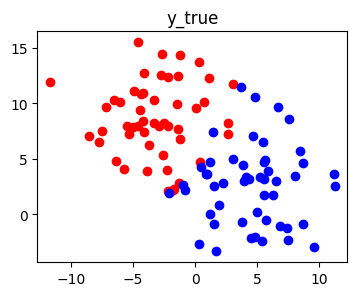

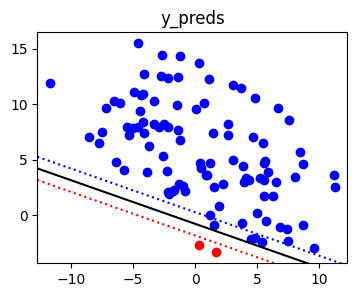

In [8]:
plot_true_vs_preds(X, y, w, b)

## Calculate Hinge Loss
Write the function that calculates Hinge Loss and visualize the result.

In [9]:
def calc_hinge_loss(X_i, y_i, w, b):
    return max(0, 1 - y_i * (np.dot(w, X_i) + b))

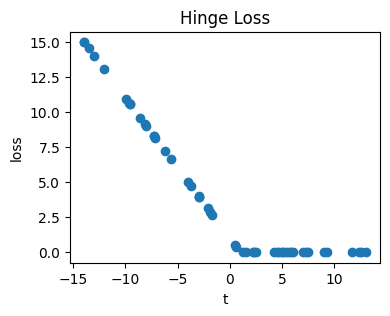

In [10]:
n_examples = 50
t = np.zeros(n_examples)
loss = np.zeros(n_examples)

for i in range(n_examples):
    t[i] = y[i] * (np.dot(w, X[i]) + b)
    loss[i] = calc_hinge_loss(X[i], y[i], w, b)

plt.figure(figsize=(4,3))
plt.scatter(t, loss)
plt.title("Hinge Loss")
plt.xlabel("t")
plt.ylabel("loss")
plt.show()

## Calculate the Cost
Plug the Hinge loss into the Cost function and add it to the the margin loss to generate the total model's cost.

In [11]:
def calc_cost(X, y, w, b, C=1):
    m = X.shape[0]

    margin_cost = (np.dot(w, w) ** 2) / 2
    
    hinge_cost = 0
    for i in range(m):
        loss_i = calc_hinge_loss(X[i], y[i], w, b)
        hinge_cost += loss_i
    hinge_cost *= C

    total_cost = margin_cost + hinge_cost
    return total_cost

In [12]:
calc_cost(X, y, w, b)

442.79701081354773

## Gradient Descent
Implement the gradient or partial derivatives for w and b.

In [13]:
def calc_gradient(X, y, w, b, C=1):
    n = X.shape[1]
    m = X.shape[0]

    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        hinge_condition = (1 - y[i] * (np.dot(w, X[i]) + b)) > 0
        if hinge_condition:
            dj_dw += w - (C * y[i] * X[i])
            dj_db += -C * y[i]
        else:
            dj_dw += w

    return dj_dw, dj_db

In [14]:
dj_dw, dj_db = calc_gradient(X, y, w, b)
dj_dw, dj_db

(array([-140.17224695,  537.4465191 ]), 44.0)

Test out a single step of gradient descent using the new `calc_gradient` function

In [15]:
alpha = 0.001
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

print(f"Before: {calc_cost(X, y, w, b)}")
print(f"After: {calc_cost(X, y, w_new, b_new)}")

Before: 442.79701081354773
After: 182.42954655729315


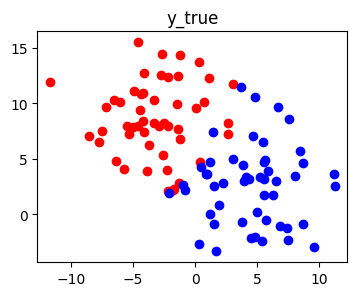

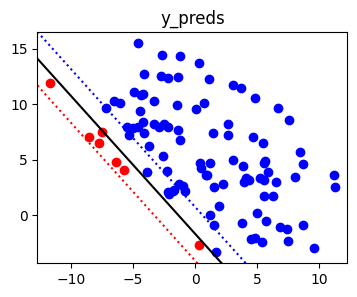

In [16]:
plot_true_vs_preds(X, y, w_new, b_new)

Run multiple iterations of gradient descent to locate a global minimum in the cost function.

In [17]:
def gradient_descent(X, y, w, b, n_iters=1000, C=1, alpha=0.001, history_step=100):
    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, y, w, b, C)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % 100 == 0:
            cost = calc_cost(X, y, w, b, C)
            print(f"Iter\t{iter}\tCost\t{cost}")
            history[iter] = cost

    return history, w, b

In [18]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	182.42954655729315
Iter	100	Cost	18.020591419100437
Iter	200	Cost	18.318048722130463
Iter	300	Cost	18.130381437559
Iter	400	Cost	18.11030739638717
Iter	500	Cost	18.110306863195248
Iter	600	Cost	18.110306863181094
Iter	700	Cost	18.110306863181094
Iter	800	Cost	18.110306863181094
Iter	900	Cost	18.110306863181094


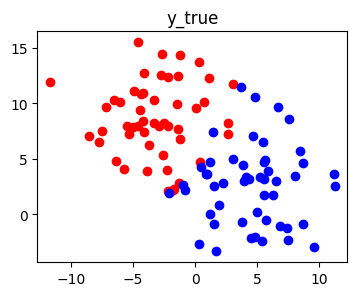

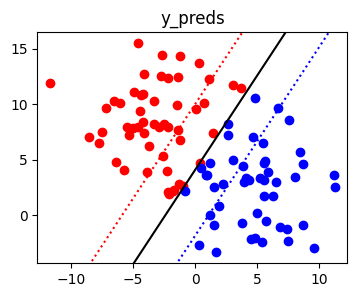

In [19]:
plot_true_vs_preds(X, y, w_new, b_new)

Plot the changes in the model's cost over all the gradient descent iterations.

In [20]:
def plot_history(history):
    plt.figure(figsize=(4,3))
    plt.plot(history.keys(), history.values())
    plt.title("Cost over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

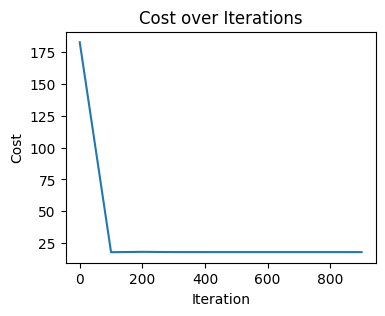

In [21]:
plot_history(history)